In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score, recall_score, precision_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
loans = pd.read_csv("loan_approval_dataset.csv")
loans.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
loans.columns = loans.columns.str.strip()
loans.drop("loan_id", axis=1, inplace=True)
loans.drop("cibil_score", axis=1, inplace=True) # Only consider 1st time applicants

loans['education'] = loans['education'].str.strip()
loans['self_employed'] = loans['self_employed'].str.strip()
loans['loan_status'] = loans['loan_status'].str.strip()

loans["education"] = loans["education"].replace({"Graduate" : 1, "Not Graduate" : 0})
loans["self_employed"] = loans["self_employed"].replace({"Yes" : 1, "No" : 0})
loans["loan_status"] = loans["loan_status"].replace({"Approved" : 1, "Rejected" : 0})

loans.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,12400000,8200000,29400000,5000000,0


In [4]:
X = loans.drop("loan_status", axis=1)
y = loans["loan_status"]

In [24]:
# Split training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.3)

# Comparing accuracies
accs_base = {"lr":0, "dtc":0, "rfc":0, "xgb":0}

# Comparing rocauc
rocauc_base = {"lr":0, "dtc":0, "rfc":0, "xgb":0}


In [25]:
# Base models
lr = LogisticRegression(random_state=1234)
dtc = DecisionTreeClassifier(random_state=1234)
rfc = RandomForestClassifier(random_state=1234)
xgb = XGBClassifier(random_state=1234)

## Unbalanced

In [26]:
accs_base["lr"] = cross_val_score(lr, X_train, y_train).mean()
accs_base["dtc"] = cross_val_score(dtc, X_train, y_train).mean()
accs_base["rfc"] = cross_val_score(rfc, X_train, y_train).mean()
accs_base["xgb"] = cross_val_score(xgb, X_train, y_train).mean()

In [28]:
rocauc_base["lr"] = cross_val_score(lr, X_train, y_train, scoring = "roc_auc").mean()
rocauc_base["dtc"] = cross_val_score(dtc, X_train, y_train, scoring = "roc_auc").mean()
rocauc_base["rfc"] = cross_val_score(rfc, X_train, y_train, scoring = "roc_auc").mean()
rocauc_base["xgb"] = cross_val_score(xgb, X_train, y_train, scoring = "roc_auc").mean()

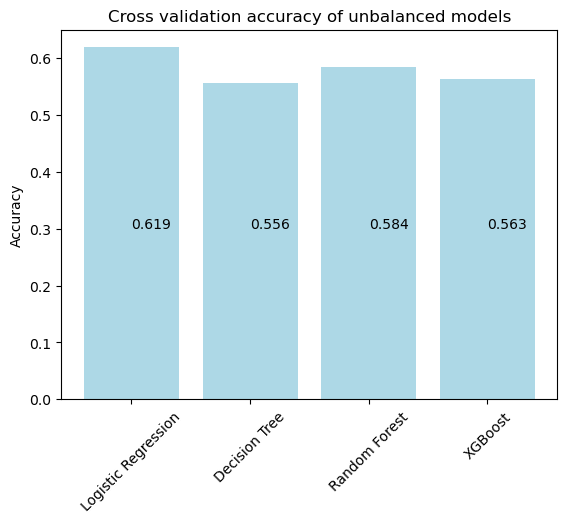

In [17]:
# Data from the accs_base dictionary
models = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"]
accuracies = list(accs_base.values())

# Create a bar graph with a blue color palette
plt.bar(models, accuracies, color='lightblue')

# Adding labels and title
plt.ylabel('Accuracy')
plt.title('Cross validation accuracy of unbalanced models')
plt.xticks(rotation=45)

# Adding text
plt.text(["Logistic Regression"], 0.3, accs_base["lr"].round(3))
plt.text(["Decision Tree"], 0.3, accs_base["dtc"].round(3))
plt.text(["Random Forest"], 0.3, accs_base["rfc"].round(3))
plt.text(["XGBoost"], 0.3, accs_base["xgb"].round(3))

# Display the bar graph
plt.show()


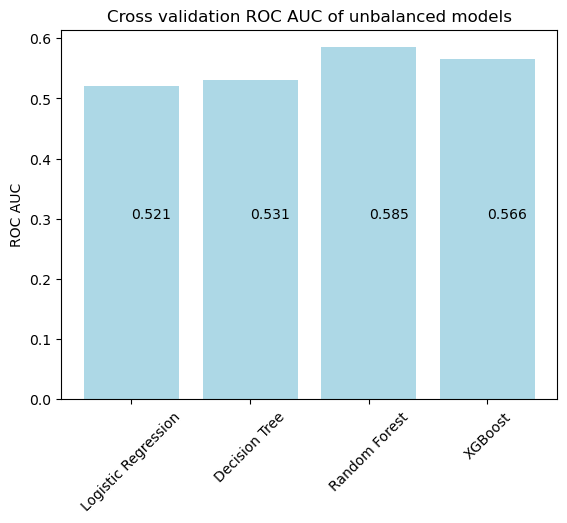

In [31]:
# Data from the accs_base dictionary
models = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"]
rocaucs = list(rocauc_base.values())

# Create a bar graph with a blue color palette
plt.bar(models, rocaucs, color='lightblue')

# Adding labels and title
plt.ylabel('ROC AUC')
plt.title('Cross validation ROC AUC of unbalanced models')
plt.xticks(rotation=45)

# Adding text
plt.text(["Logistic Regression"], 0.3, rocauc_base["lr"].round(3))
plt.text(["Decision Tree"], 0.3, rocauc_base["dtc"].round(3))
plt.text(["Random Forest"], 0.3, rocauc_base["rfc"].round(3))
plt.text(["XGBoost"], 0.3, rocauc_base["xgb"].round(3))

# Display the bar graph
plt.show()


## Balanced

In [34]:
accs_bal = {"lr":0, "dtc":0, "rfc":0, "xgb":0}
rocauc_bal = {"lr":0, "dtc":0, "rfc":0, "xgb":0}

In [35]:
# Balancing with smote
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [36]:
accs_bal["lr"] = cross_val_score(lr, X_train_smote, y_train_smote).mean()
accs_bal["dtc"] = cross_val_score(dtc, X_train_smote, y_train_smote).mean()
accs_bal["rfc"] = cross_val_score(rfc, X_train_smote, y_train_smote).mean()
accs_bal["xgb"] = cross_val_score(xgb, X_train_smote, y_train_smote).mean()

In [37]:
rocauc_bal["lr"] = cross_val_score(lr, X_train_smote, y_train_smote, scoring = "roc_auc").mean()
rocauc_bal["dtc"] = cross_val_score(dtc, X_train_smote, y_train_smote, scoring = "roc_auc").mean()
rocauc_bal["rfc"] = cross_val_score(rfc, X_train_smote, y_train_smote, scoring = "roc_auc").mean()
rocauc_bal["xgb"] = cross_val_score(xgb, X_train_smote, y_train_smote, scoring = "roc_auc").mean()

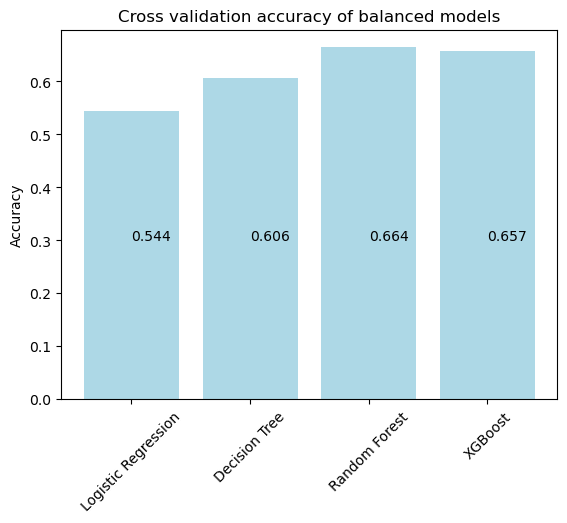

In [38]:
# Data from the accs_base dictionary
models = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"]
accuracies = list(accs_bal.values())

# Create a bar graph with a blue color palette
plt.bar(models, accuracies, color='lightblue')

# Adding labels and title
plt.ylabel('Accuracy')
plt.title('Cross validation accuracy of balanced models')
plt.xticks(rotation=45)

# Adding text
plt.text(["Logistic Regression"], 0.3, accs_bal["lr"].round(3))
plt.text(["Decision Tree"], 0.3, accs_bal["dtc"].round(3))
plt.text(["Random Forest"], 0.3, accs_bal["rfc"].round(3))
plt.text(["XGBoost"], 0.3, accs_bal["xgb"].round(3))

# Display the bar graph
plt.show()

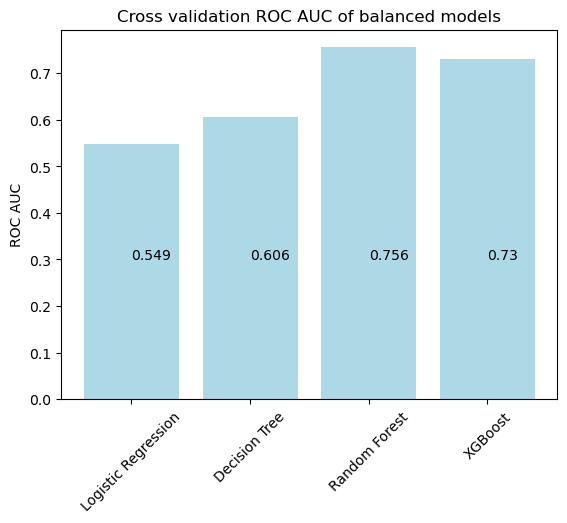

In [39]:
# Data from the accs_base dictionary
models = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"]
rocaucs = list(rocauc_bal.values())

# Create a bar graph with a blue color palette
plt.bar(models, rocaucs, color='lightblue')

# Adding labels and title
plt.ylabel('ROC AUC')
plt.title('Cross validation ROC AUC of balanced models')
plt.xticks(rotation=45)

# Adding text
plt.text(["Logistic Regression"], 0.3, rocauc_bal["lr"].round(3))
plt.text(["Decision Tree"], 0.3, rocauc_bal["dtc"].round(3))
plt.text(["Random Forest"], 0.3, rocauc_bal["rfc"].round(3))
plt.text(["XGBoost"], 0.3, rocauc_bal["xgb"].round(3))

# Display the bar graph
plt.show()

## Feature selection

### Balanced RFC

In [72]:
# feature selection
brfc_sfs = SFS(
    RandomForestClassifier(random_state = 1234),
    k_features=(1, X_train_smote.shape[1]),
    forward=True,
    scoring="accuracy",
    cv=5,
    verbose=0,
    n_jobs=-1
)
brfc_sfs.fit(X_train_smote, y_train_smote)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=1234),
                          k_features=(1, 10), n_jobs=-1, scoring='accuracy')

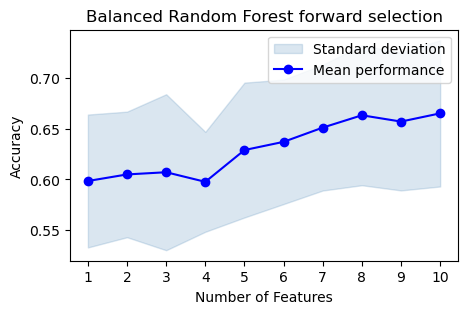

In [73]:
plot_sfs(rfc_sfs.get_metric_dict(), ylabel="Accuracy", figsize=(5,3))
plt.title("Balanced Random Forest forward selection")
plt.legend(["Standard deviation", "Mean performance"])

In [74]:
brfc_sfs.k_feature_names_

('no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value')

In [75]:
brfc_sfs.k_score_

0.6823007716783088

On hieman hyötyä tehdä feature selectionia

In [104]:
X_train_brfc = brfc_sfs.transform(X_train_smote)
X_test_brfc = brfc_sfs.transform(X_test)
y_train_brfc = y_train_smote

In [105]:
rfc = RandomForestClassifier()
brfc_sfs_model = rfc.fit(X_train_brfc, y_train_brfc)
y_pred_brfc = brfc_sfs_model.predict(X_test_brfc)

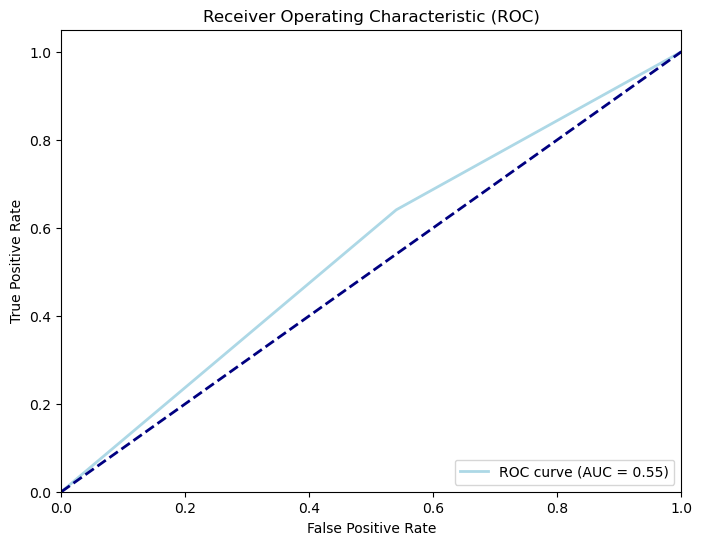

In [131]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_brfc)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='lightblue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [107]:
print(accuracy_score(y_test, y_pred_rfc))
print(recall_score(y_test, y_pred_rfc))
print(precision_score(y_test, y_pred_rfc))

0.5745511319281811
0.654275092936803
0.6649874055415617


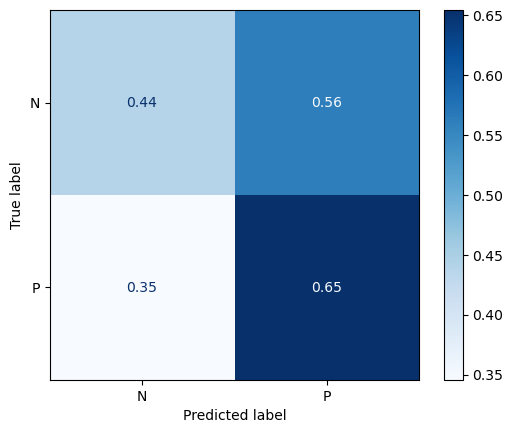

In [108]:
cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc, cmap="Blues", display_labels=["N", "P"], normalize="true")

## Hyper parameter tuning

### Balanced RFC

In [109]:
# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [220],
    'max_depth': [None],
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [1,],
}

# Create GridSearchCV object
brfc_cv = GridSearchCV(
    estimator=RandomForestClassifier(random_state = 1234), 
    param_grid=param_grid, 
    cv=5, 
    scoring="accuracy",
    refit=True, 
    n_jobs=-1, 
    verbose=1
)

# Fit the model to the training data
brfc_cv.fit(X_train_brfc, y_train_brfc)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/opt/software/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/software/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/software/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/opt/software/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/software/lib/python3.10/site-packages/

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
             n_jobs=-1,
             param_grid={'max_depth': [None], 'min_samples_leaf': [1],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [220]},
             scoring='accuracy', verbose=1)

In [110]:
# Retrieve the best parameters and best score
brfc_cv_best_params = brfc_cv.best_params_
brfc_cv_best_score = brfc_cv.best_score_

# Print the best parameters and best score
print("Best parameters:")
pp.pprint(brfc_cv_best_params)
print()
print("Best performance:")
print(brfc_cv_best_score)

Best parameters:
{   'max_depth': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 220}

Best performance:
0.6933869728998282


### Comparison of accuracy improvement

In [116]:
#values = [accs_bal["rfc"], rfc_cv_best_score, accs_base["lr"], lr_cv_best_score]
#
## Create a list of colors for each pair of values
#colors = ['lightblue', 'lightblue', 'darkblue', 'darkblue']
#
## Create labels for each bar
#labels = ['Random Forest base', 'Random Forest tuned', 'Logistic Regression base', 'Logistic Regression tuned']
#
## Create a bar graph with customized colors
#plt.bar(labels, values, color=colors)
#
## Adding labels and title
#plt.xlabel('Models')
#plt.ylabel('Accuracy')
#plt.title('Effects of hyperparameter tuning')
#
## Rotate x-axis labels for better visibility if needed
#plt.xticks(rotation=45)
#
## Display the bar graph
#plt.show()

## Final evaluation

### Balanced RFC

In [113]:
y_pred_brfc_final = brfc_cv.predict(X_test_rfc)
print(f"acc: {accuracy_score(y_test, y_pred_brfc_final)}")
print(f"recall: {recall_score(y_test, y_pred_brfc_final)}")
print(f"precision: {precision_score(y_test, y_pred_brfc_final)}")

acc: 0.6104605776736924
recall: 0.8351920693928129
precision: 0.6480769230769231


/opt/software/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


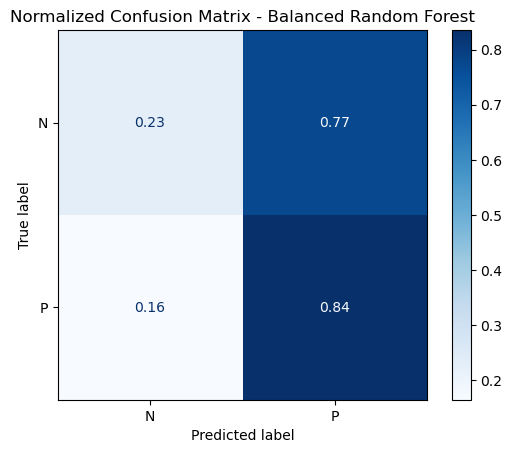

In [114]:
cmd_brfc_final = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_brfc_final, cmap="Blues", display_labels=["N", "P"], normalize="true")

# Set a title for the confusion matrix display
cmd_brfc_final.ax_.set_title('Normalized Confusion Matrix - Balanced Random Forest')

# Display the confusion matrix
plt.show()

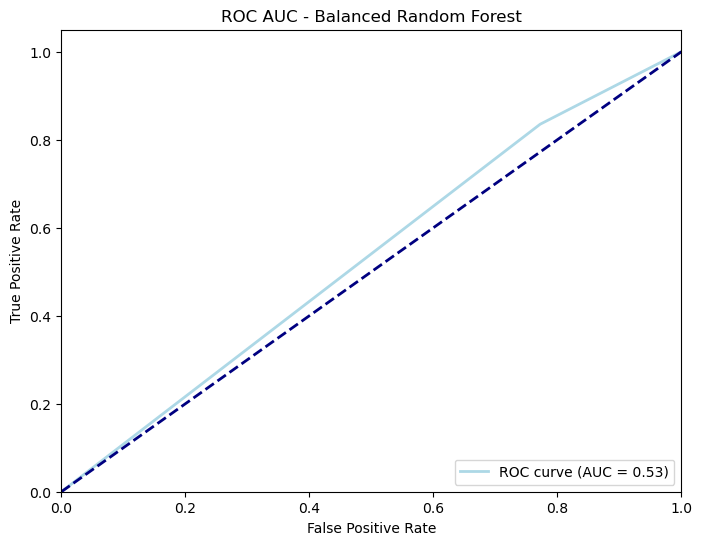

In [128]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_brfc_final)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='lightblue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC - Balanced Random Forest')
plt.legend(loc='lower right')
plt.show()

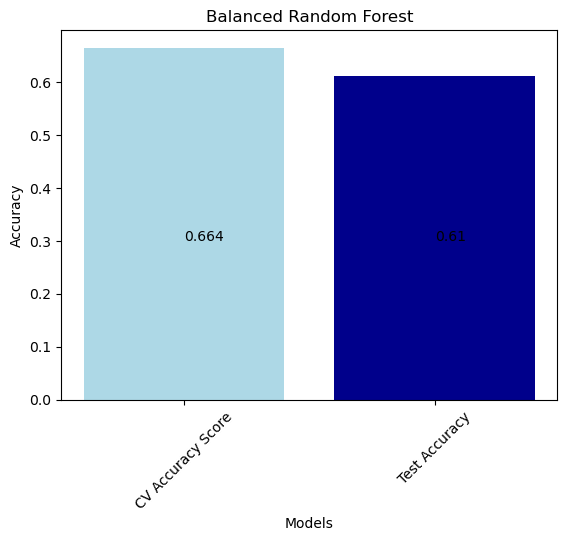

In [130]:
values = [accs_bal["rfc"], accuracy_score(y_test, y_pred_brfc_final)]

# Create a list of colors
colors = ['lightblue', 'darkblue']

# Create labels for each bar
labels = ['CV Accuracy Score', 'Test Accuracy',]

# Create a bar graph with customized colors
plt.bar(labels, values, color=colors)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Balanced Random Forest')

# Adding text
plt.text(['CV Accuracy Score'], 0.3, accs_bal["rfc"].round(3))
plt.text(['Test Accuracy'], 0.3, accuracy_score(y_test, y_pred_brfc_final).round(3))

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Display the bar graph
plt.show()

#There is overfitting